## Import Library

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (2).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudia setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Load Data

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (2).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Frequency Encoding

In [ ]:
freq_et = data['PaymentMethod'].value_counts().reset_index()
freq_et

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [ ]:
freq_et = data['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,pct_PaymentMethod
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


In [ ]:
data = data.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')
data[['PaymentMethod','pct_PaymentMethod']]

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.58
1,Electronic check,33.58
2,Electronic check,33.58
3,Electronic check,33.58
4,Electronic check,33.58
...,...,...
7038,Credit card (automatic),21.61
7039,Credit card (automatic),21.61
7040,Credit card (automatic),21.61
7041,Credit card (automatic),21.61


Mean Encoding

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Hitung kemunculan category pada dataset

In [ ]:
freq_et= data['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et

,InternetService,freq_InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


Jumlahkan value target(SeniorCitizen) berdasarkan category

In [ ]:
sum_et = data.groupby(['InternetService']).agg({'SeniorCitizen':sum}).reset_index()
sum_et.rename(columns={"SeniorCitizen": "sum_InternetService"}, inplace = True)
sum_et

,InternetService,sum_InternetService
0,DSL,259
1,Fiber optic,831
2,No,52


Hitung mean encoding untuk InternetService

In [ ]:
mean_ec = freq_et.merge(sum_et, on='InternetService', how='inner')
mean_ec['mean_ec_InternetService'] = round((mean_ec['sum_InternetService']/mean_ec['freq_InternetService']),2)
mean_ec

,InternetService,freq_InternetService,sum_InternetService,mean_ec_InternetService
0,Fiber optic,3096,831,0.27
1,DSL,2421,259,0.11
2,No,1526,52,0.03


In [ ]:
data = data.merge(mean_ec[['InternetService','mean_ec_InternetService']], on='InternetService', how='inner')
data[['InternetService','mean_ec_InternetService']]

,InternetService,mean_ec_InternetService
0,DSL,0.11
1,DSL,0.11
2,DSL,0.11
3,DSL,0.11
4,DSL,0.11
...,...,...
7038,No,0.03
7039,No,0.03
7040,No,0.03
7041,No,0.03


In [ ]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Ordinal Encoding

In [7]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn (1).csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [12]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn (1).csv']))

In [13]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [19]:
map_OnlineSecurity = {'Yes':1,
             'No':2}
data['OnlineSecurity_cat'] = data['OnlineSecurity'].map(map_OnlineSecurity)
data[['OnlineSecurity','OnlineSecurity_cat']].head()

,OnlineSecurity,OnlineSecurity_cat
0,No,2.0
1,Yes,1.0
2,Yes,1.0
3,Yes,1.0
4,No,2.0


In [20]:
data[['OnlineSecurity','OnlineSecurity_cat']].drop_duplicates()

,OnlineSecurity,OnlineSecurity_cat
0,No,2.0
1,Yes,1.0
11,No internet service,NaN


In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

One Hot Encoding

In [ ]:
dummies_Contract = pd.get_dummies(data['Contract'],prefix='Contract')
dummies_Contract.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
data = pd.concat([data, dummies_Contract], axis=1)
data[['Contract','Contract_Month-to-month','Contract_One year','Contract_Two year']].head()

,Contract,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Month-to-month,1,0,0
1,Month-to-month,1,0,0
2,Month-to-month,1,0,0
3,Month-to-month,1,0,0
4,Month-to-month,1,0,0


### Outlier Handling

In [ ]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Bagaimana handling outlier pada kolom total_bill??

Handling outlier dengan IQR

In [ ]:
data = sns.load_dataset('tips')
print(data.shape)
data.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data))

Jumlah baris sebelum handling outlier pada kolom total_bill: 244


In [ ]:
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['total_bill'] >= low_limit) & (data['total_bill'] <= high_limit))
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 235


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
244-235


9

In [ ]:
((244 - 235)/244)*100

3.6885245901639343

<function matplotlib.pyplot.tight_layout>

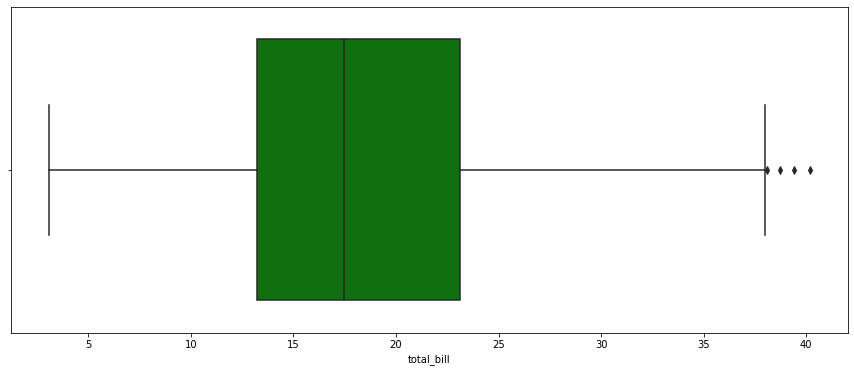

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout    